In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# customized colormap for target classes designation
color_set = ["red", "orange", "goldenrod", "yellow", "spring green", "green", "cyan", 
          "cerulean", "deep blue", "violet", "dark magenta", "magenta", "pink", "pinkish red"]

# Training set - Metadata

In [2]:
df_train_meta = pd.read_csv('training_set_metadata.csv', sep = ',', header = 0, index_col = 'object_id',
                            dtype = {'target': np.object}
                           )
df_train_meta.target = 'class_'+ df_train_meta.target
df_train_meta.target = df_train_meta.target.astype('category')
print (df_train_meta.shape)
df_train_meta.dtypes

(7848, 11)


ra                     float64
decl                   float64
gal_l                  float64
gal_b                  float64
ddf                      int64
hostgal_specz          float64
hostgal_photoz         float64
hostgal_photoz_err     float64
distmod                float64
mwebv                  float64
target                category
dtype: object

<b>object_id</b>: unique object identifier. Int32

In [3]:
df_train_meta.head()

ra       decl       gal_l      gal_b  ddf  hostgal_specz  \
object_id                                                                     
615        349.046051 -61.943836  320.796530 -51.753706    1         0.0000   
713         53.085938 -27.784405  223.525509 -54.460748    1         1.8181   
730         33.574219  -6.579593  170.455585 -61.548219    1         0.2320   
745          0.189873 -45.586655  328.254458 -68.969298    1         0.3037   
1124       352.711273 -63.823658  316.922299 -51.059403    1         0.1934   

           hostgal_photoz  hostgal_photoz_err  distmod  mwebv    target  
object_id                                                                
615                0.0000              0.0000      NaN  0.017  class_92  
713                1.6267              0.2552  45.4063  0.007  class_88  
730                0.2262              0.0157  40.2561  0.021  class_42  
745                0.2813              1.1523  40.7951  0.007  class_90  
1124               0.2415              0.0176  40.4166  0.024  class_90

In [4]:
df_train_meta.describe()

ra         decl        gal_l        gal_b          ddf  \
count  7848.000000  7848.000000  7848.000000  7848.000000  7848.000000   
mean    169.719379   -27.254846   230.466784   -20.115526     0.269623   
std     114.212761    20.248556    97.416392    40.390899     0.443792   
min       0.175781   -64.760857     0.107681   -89.615573     0.000000   
25%      62.402344   -44.597992   207.248509   -54.509752     0.000000   
50%     150.996094   -27.279613   244.127187   -30.217582     0.000000   
75%     282.875976    -8.838267   313.224277    16.913859     1.000000   
max     359.824219     4.181528   359.943827    65.931317     1.000000   

       hostgal_specz  hostgal_photoz  hostgal_photoz_err      distmod  \
count    7848.000000     7848.000000         7848.000000  5523.000000   
mean        0.254436        0.357885            0.155695    41.263961   
std         0.330053        0.545552            0.300367     2.262711   
min         0.000000        0.000000            0.000000    31.996100   
25%         0.000000        0.000000            0.000000    39.845250   
50%         0.182750        0.210300            0.018000    41.167900   
75%         0.350125        0.431200            0.122375    42.398550   
max         3.445100        2.999400            1.734800    47.025600   

             mwebv  
count  7848.000000  
mean      0.081953  
std       0.150598  
min       0.003000  
25%       0.018000  
50%       0.032000  
75%       0.076000  
max       2.747000

In [5]:
# check for NAs
df_train_meta.columns[df_train_meta.count() != len(df_train_meta.index)]

Index(['distmod'], dtype='object')

### ra, decl

<b>ra</b>: right ascension, sky coordinate: co-longitude in degrees. Float32
<b>decl</b>: declination, sky coordinate: co-latitude in degrees. Float32

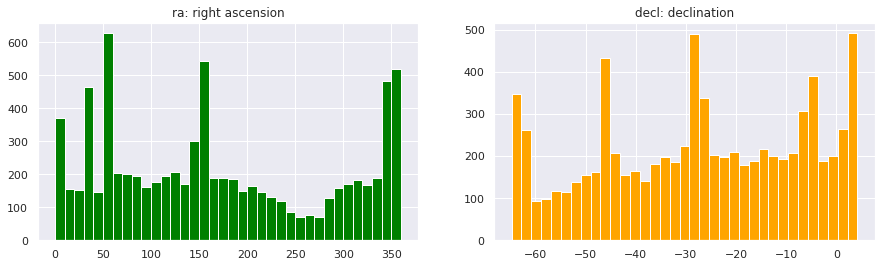

In [69]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
df_train_meta.ra.hist(bins = 36, ax = ax1, color = 'green')
df_train_meta.decl.hist(bins = 35, ax = ax2, color = 'orange')
ax1.set_title('ra: right ascension')
ax2.set_title('decl: declination');

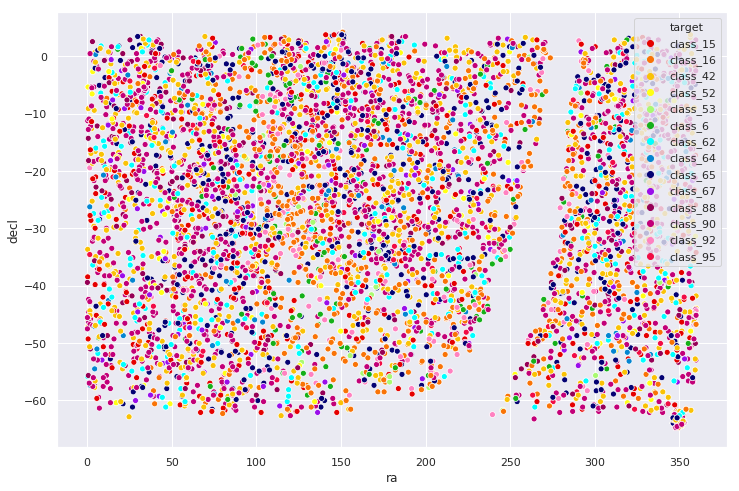

In [98]:
plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = 'ra', y = 'decl', hue = 'target', data = df_train_meta, 
                     palette = sns.xkcd_palette(color_set));

### gal_l, gal_b

<b>gal_l</b>: galactic longitude in degrees. Float32
<b>gal_b</b>: galactic latitude in degrees. Float32

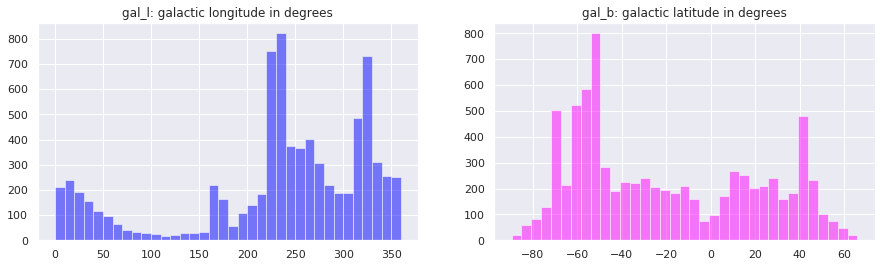

In [136]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
df_train_meta.gal_l.hist(bins = 36, ax = ax1, color = 'blue', alpha = 0.5)
df_train_meta.gal_b.hist(bins = 35, ax = ax2, color = 'magenta', alpha = 0.5)
ax1.set_title('gal_l: galactic longitude in degrees')
ax2.set_title('gal_b: galactic latitude in degrees');

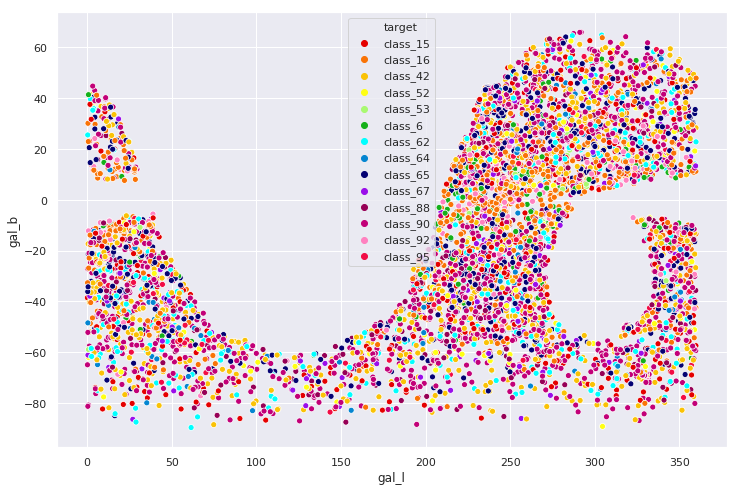

In [99]:
plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = 'gal_l', y = 'gal_b', hue = 'target', data = df_train_meta, 
                     palette = sns.xkcd_palette(color_set));

### ddf

<b>ddf</b>: A flag to identify the object as coming from the DDF survey area (with value DDF = 1 for the DDF, DDF = 0 for the WFD survey). Note that while the DDF fields are contained within the full WFD survey area, 
the DDF fluxes have significantly smaller uncertainties. Boolean

In [20]:
df_train_meta.ddf.value_counts()

0    5732
1    2116
Name: ddf, dtype: int64

### hostgal_specz

<b>hostgal_specz</b>: the spectroscopic redshift of the source. This is an extremely accurate measure of redshift, 
available for the training set and a small fraction of the test set. Float32

In [73]:
(df_train_meta.hostgal_specz == 0).value_counts()

False    5523
True     2325
Name: hostgal_specz, dtype: int64

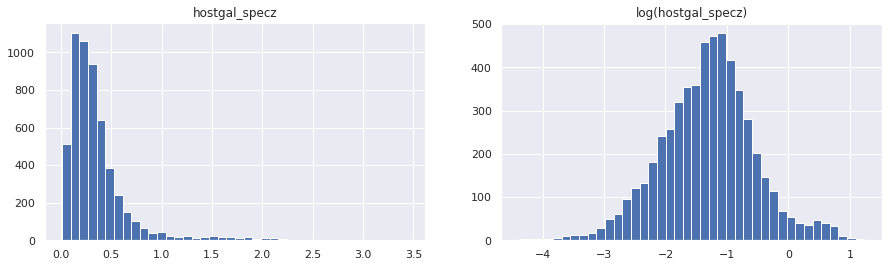

In [74]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
df_train_meta[df_train_meta.hostgal_specz != 0].hostgal_specz.hist(bins = 40, ax = ax1)
np.log(df_train_meta[df_train_meta.hostgal_specz != 0].hostgal_specz).hist(bins = 40, ax = ax2)
ax1.set_title('hostgal_specz')
ax2.set_title('log(hostgal_specz)');

### hostgal_photoz

<b>hostgal_photoz</b>: The photometric redshift of the host galaxy of the astronomical source. While this is meant 
to be a proxy for hostgal_specz, there can be large differences between the two and should be regarded as 
a far less accurate version of hostgal_specz. Float32

In [50]:
confusion_matrix(df_train_meta.hostgal_specz == 0, 
                 df_train_meta.hostgal_photoz == 0)

array([[5523,    0],
       [   0, 2325]])

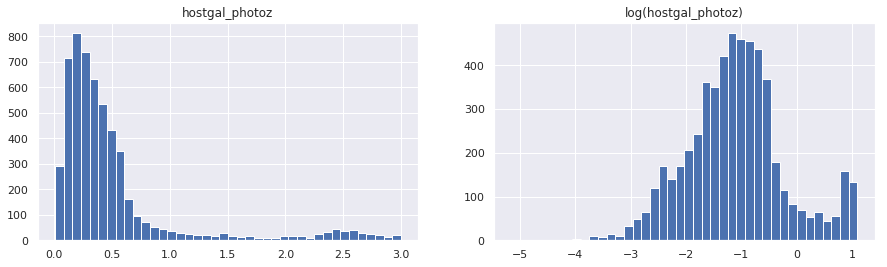

In [39]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
df_train_meta[df_train_meta.hostgal_photoz != 0].hostgal_photoz.hist(bins = 40, ax = ax1)
np.log(df_train_meta[df_train_meta.hostgal_photoz != 0].hostgal_photoz).hist(bins = 40, ax = ax2)
ax1.set_title('hostgal_photoz')
ax2.set_title('log(hostgal_photoz)');

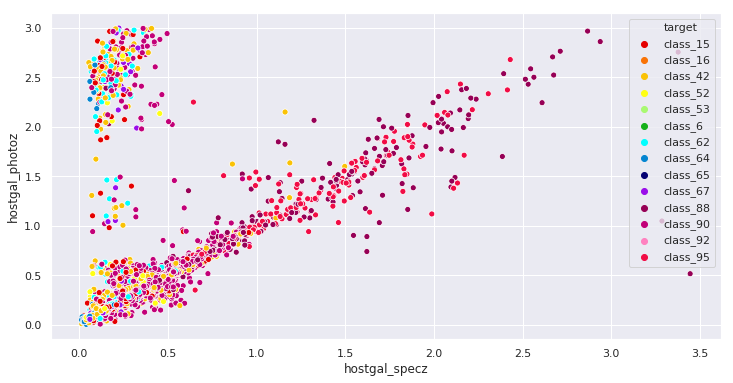

In [102]:
# hostgal_photoz vs hostgal_specz
plt.figure(figsize = (12, 6))
ax = sns.scatterplot(x = df_train_extragal.hostgal_specz, 
                     y = df_train_extragal.hostgal_photoz, 
                     hue = df_train_extragal.target, 
                     palette = sns.xkcd_palette(color_set));

### hostgal_photoz_err

<b>hostgal_photoz_err</b>: The uncertainty on the hostgal_photoz based on LSST survey projections. Float32

In [34]:
(df_train_meta.hostgal_photoz_err == 0).value_counts()

False    5523
True     2325
Name: hostgal_photoz_err, dtype: int64

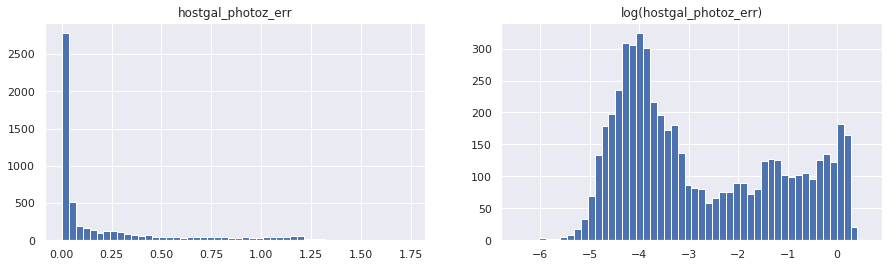

In [40]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
df_train_meta[df_train_meta.hostgal_photoz_err != 0].hostgal_photoz_err.hist(bins = 50, ax = ax1)
np.log(df_train_meta[df_train_meta.hostgal_photoz_err != 0].hostgal_photoz_err).hist(bins = 50, ax = ax2)
ax1.set_title('hostgal_photoz_err')
ax2.set_title('log(hostgal_photoz_err)');

### distmod

<b>distmod</b>: The distance to the source calculated from hostgal_photoz and using general relativity. Float32

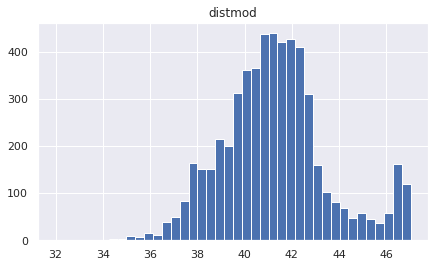

In [160]:
plt.figure(figsize = (7, 4))
ax = df_train_meta.distmod.hist(bins = 40)
ax.set_title('distmod');

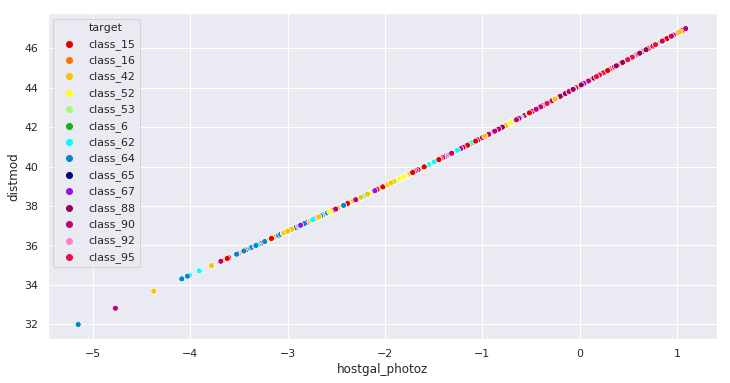

In [101]:
# distmod vs log(hostgal_photoz) - almost exactly linear
plt.figure(figsize = (12, 6))
df_train_extragal = df_train_meta[df_train_meta.hostgal_photoz != 0]
ax = sns.scatterplot(x = np.log(df_train_extragal.hostgal_photoz), 
                     y = df_train_extragal.distmod, 
                     hue = df_train_extragal.target, 
                     palette = sns.xkcd_palette(color_set));

In [47]:
# NAs in distmod - zeroes in hostgal_specz and hostgal_photoz
df_train_meta[df_train_meta.distmod.isnull()].describe()

ra         decl        gal_l        gal_b          ddf  \
count  2325.000000  2325.000000  2325.000000  2325.000000  2325.000000   
mean    174.686149   -26.806672   231.326938   -10.434551     0.232258   
std      99.661991    20.263123    95.591558    35.899237     0.422364   
min       0.189873   -64.760857     0.215743   -84.975785     0.000000   
25%     101.250000   -43.406857   219.187676   -48.122744     0.000000   
50%     151.171875   -26.944359   244.007733    -8.773774     0.000000   
75%     256.640625    -7.933337   300.812032    17.529299     0.000000   
max     359.814819     4.181528   359.943827    64.054506     1.000000   

       hostgal_specz  hostgal_photoz  hostgal_photoz_err  distmod        mwebv  
count         2325.0          2325.0              2325.0      0.0  2325.000000  
mean             0.0             0.0                 0.0      NaN     0.141224  
std              0.0             0.0                 0.0      NaN     0.227477  
min              0.0             0.0                 0.0      NaN     0.004000  
25%              0.0             0.0                 0.0      NaN     0.020000  
50%              0.0             0.0                 0.0      NaN     0.055000  
75%              0.0             0.0                 0.0      NaN     0.146000  
max              0.0             0.0                 0.0      NaN     2.747000

### mwebv

<b>mwebv</b>: MW E(B-V). this ‘extinction’ of light is a property of the Milky Way (MW) dust along the line of sight
to the astronomical source, and is thus a function of the sky coordinates of the source <b>ra, decl</b>. 
This is used to determine a passband dependent dimming and redenning of light from astronomical sources as
described in subsection 2.1, and based on the Schlafly et al. (2011) and Schlegel et al. (1998) dust models. Float32

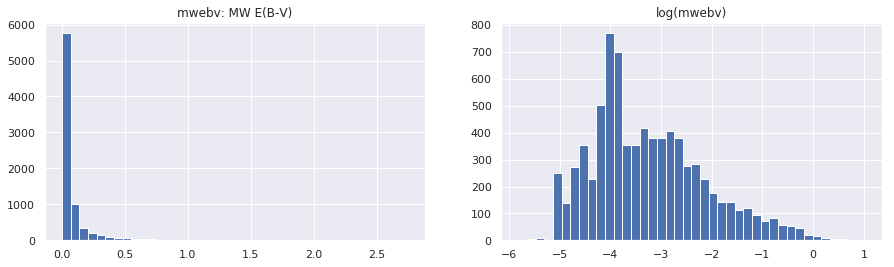

In [18]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
df_train_meta.mwebv.hist(bins = 40, ax = ax1)
np.log(df_train_meta.mwebv).hist(bins = 40, ax = ax2)
ax1.set_title('mwebv: MW E(B-V)');
ax2.set_title('log(mwebv)');

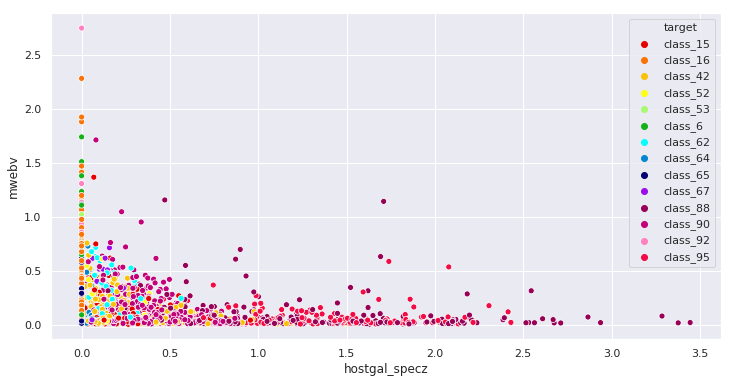

In [103]:
plt.figure(figsize = (12, 6))
ax = sns.scatterplot(x = df_train_meta.hostgal_specz, 
                     y = df_train_meta.mwebv, 
                     hue = df_train_meta.target, 
                     palette = sns.xkcd_palette(color_set));

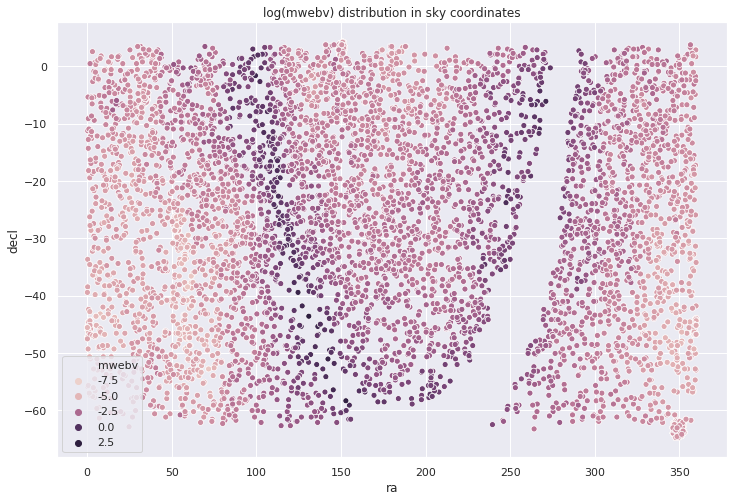

In [111]:
plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = df_train_meta.ra, y = df_train_meta.decl, hue = np.log(df_train_meta.mwebv))
plt.title('log(mwebv) distribution in sky coordinates');

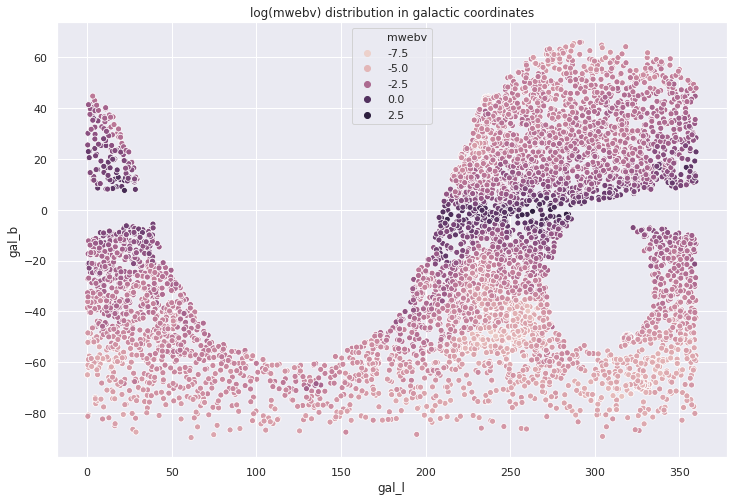

In [113]:
plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = df_train_meta.gal_l, y = df_train_meta.gal_b, hue = np.log(df_train_meta.mwebv))
plt.title('log(mwebv) distribution in galactic coordinates');

### target

<b>target</b>: The class of the astronomical source. This is provided in the training data. Correctly determining 
the target (correctly assigning classification probabilities to the objects) is the ‘goal’ of the classification 
challenge for the test data. Int8

Note that there is one class in the test set that does not occur in the training set: 
class_99 serves as an "other" class for objects that don't belong in any of the 14 classes in the training set. 


class_90    2313
class_42    1193
class_65     981
class_16     924
class_15     495
class_62     484
class_88     370
class_92     239
class_67     208
class_52     183
class_95     175
class_6      151
class_64     102
class_53      30
Name: target, dtype: int64

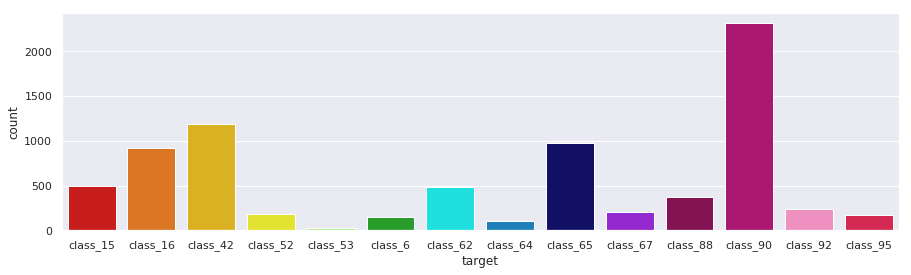

In [115]:
plt.figure(figsize = (15, 4))
ax = sns.countplot(x="target", data=df_train_meta, palette = sns.xkcd_palette(color_set))
df_train_meta.target.value_counts()

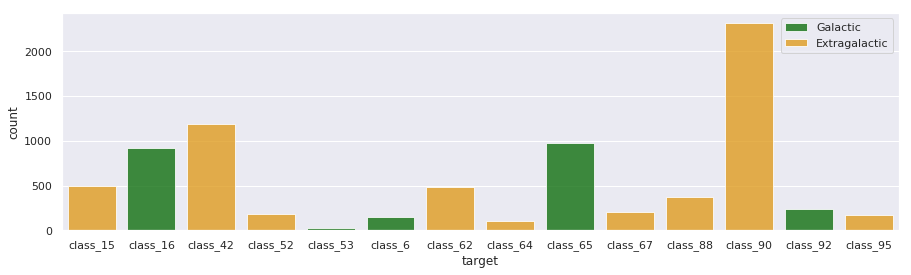

In [117]:
galactic = df_train_meta['hostgal_photoz'] == 0

plt.figure(figsize = (15, 4))
sns.countplot(x=df_train_meta[galactic].target, color = 'Green', alpha=0.8, label = 'Galactic')
sns.countplot(x=df_train_meta[~galactic].target, color = 'Orange', alpha=0.8, label = 'Extragalactic')
plt.legend();

# Test set Metadata file

In [119]:
df_test_meta = pd.read_csv('test_set_metadata.csv', sep = ',', header = 0, index_col = 'object_id')
print (df_test_meta.shape)
df_test_meta.head()

(3492890, 10)


ra       decl       gal_l      gal_b  ddf  hostgal_specz  \
object_id                                                                     
13          34.453125  -5.229529  169.987075 -59.956185    1         0.3048   
14          33.398438  -4.331149  167.226341 -59.936551    1            NaN   
17         348.529419 -61.755440  321.293980 -51.763351    1            NaN   
23          34.804688  -5.829153  171.307861 -60.174401    1            NaN   
34         351.321442 -64.198746  317.458993 -50.429931    1         0.4557   

           hostgal_photoz  hostgal_photoz_err  distmod  mwebv  
object_id                                                      
13                 0.3193              0.0542  41.1123  0.019  
14                 0.6323              0.0179  42.8774  0.018  
17                 0.8297              0.0605  43.6000  0.016  
23                 0.6533              0.1479  42.9640  0.023  
34                 0.4617              0.0122  42.0540  0.023

In [120]:
df_test_meta.describe()

ra          decl         gal_l         gal_b           ddf  \
count  3.492890e+06  3.492890e+06  3.492890e+06  3.492890e+06  3.492890e+06   
mean   1.705897e+02 -2.624964e+01  2.178545e+02 -1.843280e+01  9.426578e-03   
std    1.092068e+02  1.764381e+01  1.081992e+02  3.958926e+01  9.663188e-02   
min    0.000000e+00 -6.476086e+01  1.036900e-02 -8.967441e+01  0.000000e+00   
25%    7.277344e+01 -4.042390e+01  1.733004e+02 -5.280274e+01  0.000000e+00   
50%    1.611914e+02 -2.511770e+01  2.459314e+02 -2.448392e+01  0.000000e+00   
75%    2.758614e+02 -1.126298e+01  2.983127e+02  1.726843e+01  0.000000e+00   
max    3.598242e+02  4.181528e+00  3.599956e+02  6.606870e+01  1.000000e+00   

       hostgal_specz  hostgal_photoz  hostgal_photoz_err       distmod  \
count  120393.000000    3.492890e+06        3.492890e+06  3.102380e+06   
mean        0.305988    5.168159e-01        1.535211e-01  4.217862e+01   
std         0.159928    4.491342e-01        2.752581e-01  1.587242e+00   
min         0.007700    0.000000e+00        0.000000e+00  2.764620e+01   
25%         0.192600    2.683000e-01        1.380000e-02  4.124470e+01   
50%         0.295800    4.619000e-01        3.030000e-02  4.227200e+01   
75%         0.406000    6.557000e-01        1.432000e-01  4.308390e+01   
max         1.201400    3.000000e+00        1.871400e+00  4.702610e+01   

              mwebv  
count  3.492890e+06  
mean   9.196644e-02  
std    1.551435e-01  
min    2.000000e-03  
25%    2.300000e-02  
50%    4.500000e-02  
75%    9.100000e-02  
max    2.994000e+00

In [26]:
# check for NAs
df_test_meta.columns[df_test_meta.count() != len(df_test_meta.index)]

Index(['hostgal_specz', 'distmod'], dtype='object')

### ra, decl

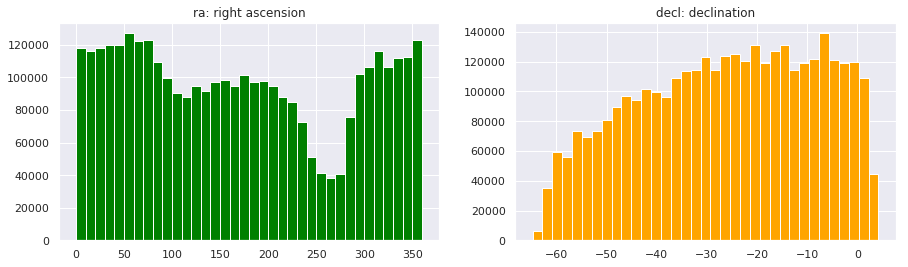

In [121]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
df_test_meta.ra.hist(bins = 36, ax = ax1, color = 'green');
df_test_meta.decl.hist(bins = 35, ax = ax2, color = 'orange');
ax1.set_title('ra: right ascension');
ax2.set_title('decl: declination');

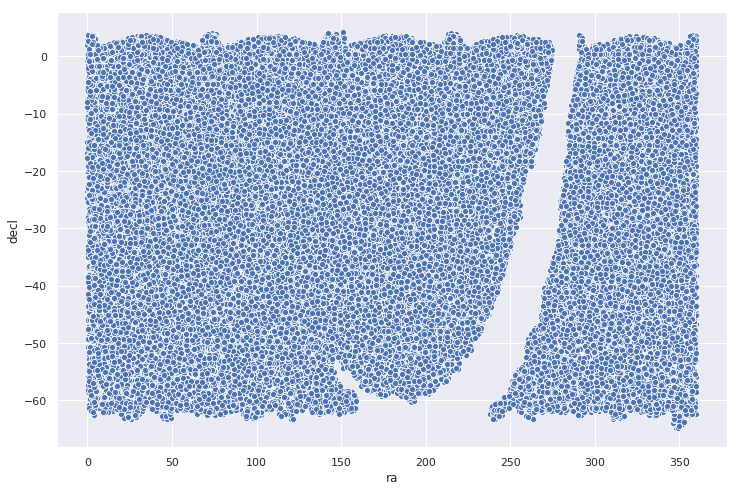

In [123]:
plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = 'ra', y = 'decl', data = df_test_meta);

### gal_l, gal_b

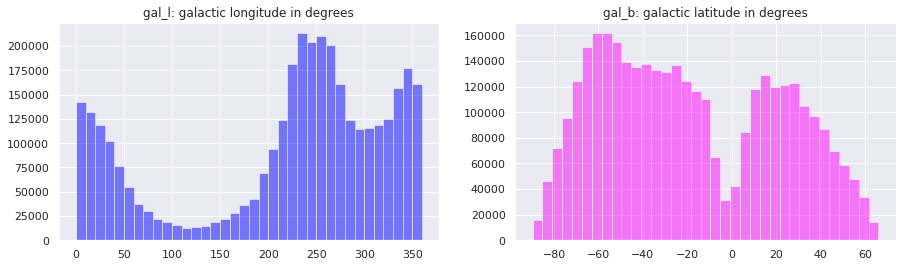

In [134]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
df_test_meta.gal_l.hist(bins = 36, ax = ax1, color = 'blue', alpha = 0.5);
df_test_meta.gal_b.hist(bins = 35, ax = ax2, color = 'magenta', alpha = 0.5);
ax1.set_title('gal_l: galactic longitude in degrees');
ax2.set_title('gal_b: galactic latitude in degrees');

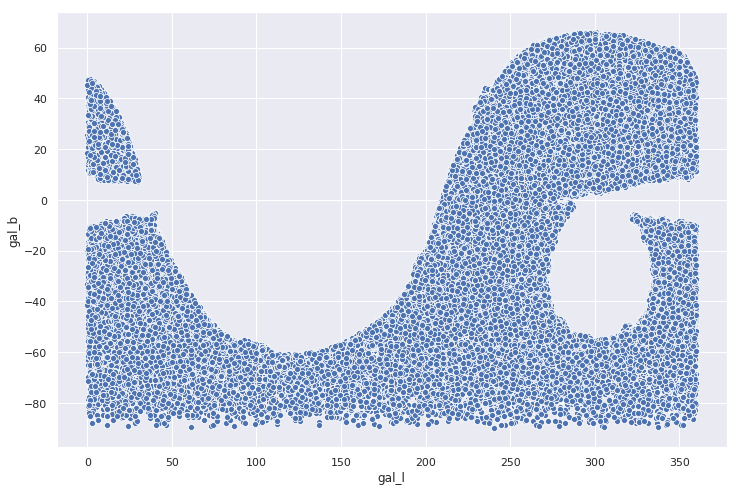

In [30]:
plt.figure(figsize(12, 8))
ax = sns.scatterplot(x = 'gal_l', y = 'gal_b', data = df_test_meta);

### ddf

In [131]:
df_test_meta.ddf.value_counts()

0    3459964
1      32926
Name: ddf, dtype: int64

### hostgal_specz

In [145]:
(df_test_meta.hostgal_specz.isnull()).value_counts()

True     3372497
False     120393
Name: hostgal_specz, dtype: int64

In [150]:
(df_test_meta[df_test_meta.hostgal_specz.notnull()].hostgal_specz == 0).value_counts()

False    120393
Name: hostgal_specz, dtype: int64

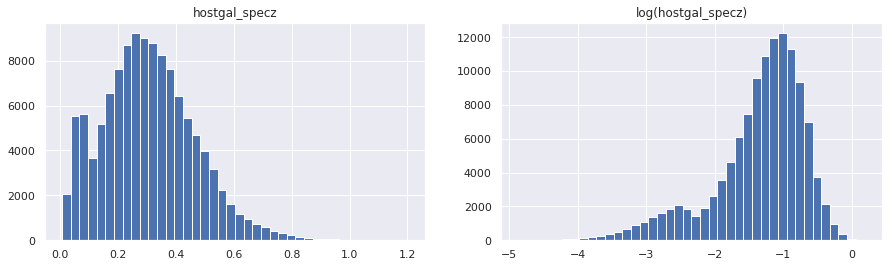

In [151]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
df_test_meta.hostgal_specz.hist(bins = 40, ax = ax1)
np.log(df_test_meta.hostgal_specz).hist(bins = 40, ax = ax2)
ax1.set_title('hostgal_specz')
ax2.set_title('log(hostgal_specz)');

### hostgal_photoz

In [152]:
(df_test_meta.hostgal_photoz == 0).value_counts()

False    3102380
True      390510
Name: hostgal_photoz, dtype: int64

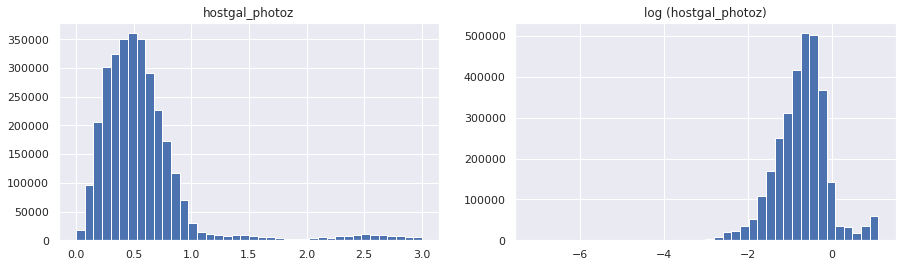

In [154]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
df_test_meta[df_test_meta.hostgal_photoz != 0].hostgal_photoz.hist(bins = 40, ax = ax1)
np.log(df_test_meta[df_test_meta.hostgal_photoz != 0].hostgal_photoz).hist(bins = 40, ax = ax2)
ax1.set_title('hostgal_photoz')
ax2.set_title('log (hostgal_photoz)');

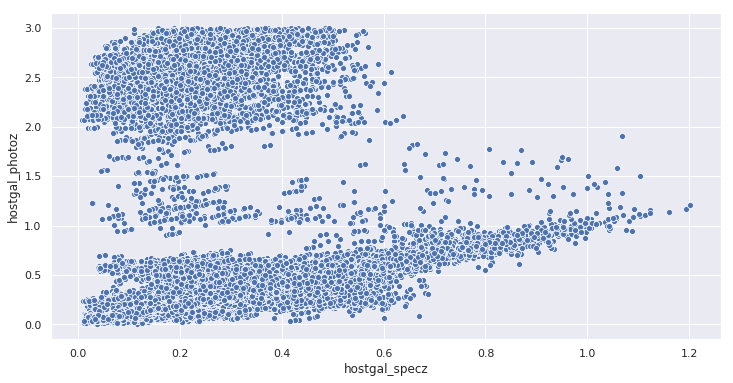

In [38]:
# зависимость hostgal_photoz от hostgal_specz
plt.figure(figsize(12, 6))
ax = sns.scatterplot(x = df_test_meta.hostgal_specz, y = df_test_meta.hostgal_photoz);

### hostgal_photoz_err

In [155]:
(df_test_meta.hostgal_photoz_err == 0).value_counts()

False    3102380
True      390510
Name: hostgal_photoz_err, dtype: int64

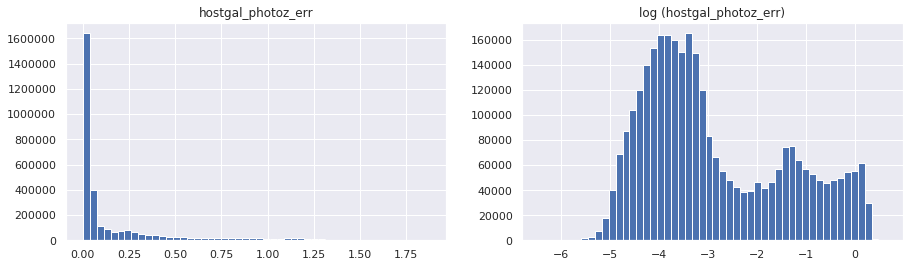

In [156]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
df_test_meta[df_test_meta.hostgal_photoz_err != 0].hostgal_photoz_err.hist(bins = 50, ax = ax1)
np.log(df_test_meta[df_test_meta.hostgal_photoz_err != 0].hostgal_photoz_err).hist(bins = 50, ax = ax2)
ax1.set_title('hostgal_photoz_err')
ax2.set_title('log (hostgal_photoz_err)');

### distmod

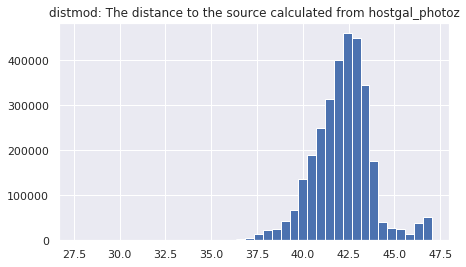

In [161]:
plt.figure(figsize =(7, 4))
ax = df_test_meta.distmod.hist(bins = 40)
ax.set_title('distmod: The distance to the source calculated from hostgal_photoz');

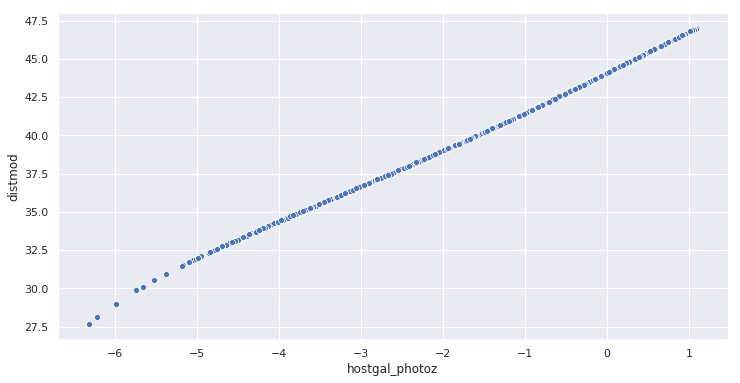

In [37]:
# distmod vs log(hostgal_photoz) - almost exactly linear
plt.figure(figsize = (12, 6))
ax = sns.scatterplot(x = np.log(df_test_meta.hostgal_photoz+0.001), y = df_test_meta.distmod);

In [39]:
df_test_meta[df_test_meta.distmod.isnull()].describe()

ra           decl          gal_l          gal_b  \
count  390510.000000  390510.000000  390510.000000  390510.000000   
mean      174.310680     -27.508775     226.327036      -4.718728   
std        84.952311      18.219796     102.112259      28.011817   
min         0.000000     -64.760857       0.010369     -89.511761   
25%       109.863281     -43.008633     214.883822     -22.245643   
50%       151.794250     -26.610098     250.056674      -1.610410   
75%       245.480774     -11.872187     291.066492      13.547128   
max       359.824219       4.181528     359.995555      66.068697   

                 ddf  hostgal_specz  hostgal_photoz  hostgal_photoz_err  \
count  390510.000000            0.0        390510.0            390510.0   
mean        0.000581            NaN             0.0                 0.0   
std         0.024103            NaN             0.0                 0.0   
min         0.000000            NaN             0.0                 0.0   
25%         0.000000            NaN             0.0                 0.0   
50%         0.000000            NaN             0.0                 0.0   
75%         0.000000            NaN             0.0                 0.0   
max         1.000000            NaN             0.0                 0.0   

       distmod          mwebv  
count      0.0  390510.000000  
mean       NaN       0.241144  
std        NaN       0.331129  
min        NaN       0.002000  
25%        NaN       0.049000  
50%        NaN       0.107000  
75%        NaN       0.304000  
max        NaN       2.994000

### mwebv

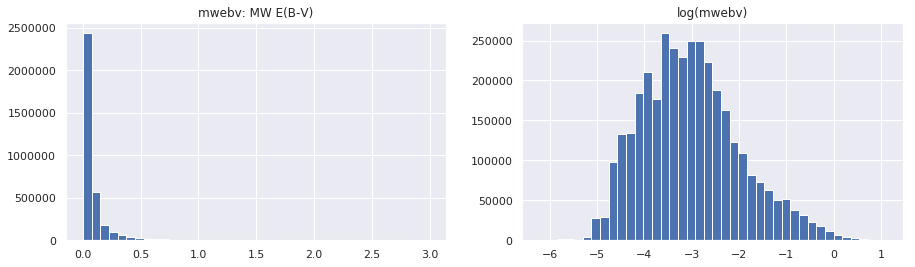

In [40]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
df_test_meta.mwebv.hist(bins = 40, ax = ax1)
np.log(df_test_meta.mwebv).hist(bins = 40, ax = ax2)
ax1.set_title('mwebv: MW E(B-V)');
ax2.set_title('log(mwebv)');

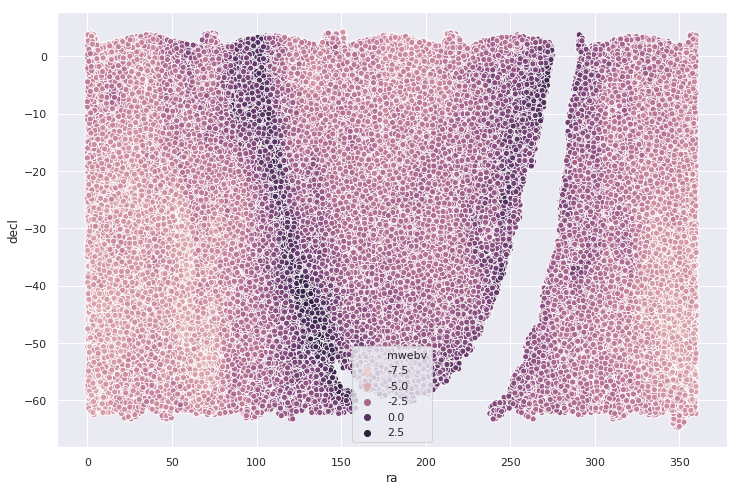

In [41]:
# распределение уровней mwebv (в лог-шкале) в пространстве координат ra, decl
plt.figure(figsize(12, 8))
ax = sns.scatterplot(x = df_test_meta.ra, y = df_test_meta.decl, hue = np.log(df_test_meta.mwebv)
                    );

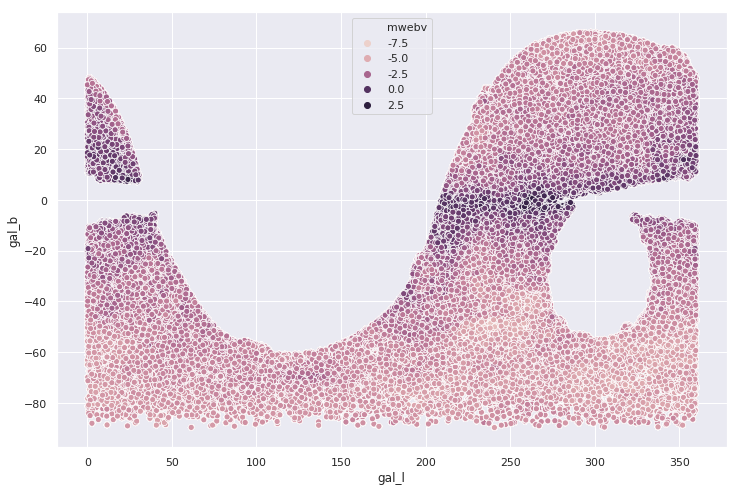

In [42]:
# распределение уровней mwebv (в лог-шкале) в пространстве координат gal_l, gal_b
plt.figure(figsize(12, 8))
ax = sns.scatterplot(x = df_test_meta.gal_l, y = df_test_meta.gal_b, hue = np.log(df_test_meta.mwebv)
                    );

# Training set Time-series data

In [6]:
df_train = pd.read_csv('training_set.csv', sep = ',', header = 0, dtype = {'passband': np.object})
df_train.passband = 'passband_'+ df_train.passband
df_train.passband = df_train.passband.astype('category')
print (df_train.shape)
df_train.dtypes

(1421705, 6)


object_id       int64
mjd           float64
passband     category
flux          float64
flux_err      float64
detected        int64
dtype: object

In [7]:
df_train.head()

object_id         mjd    passband        flux   flux_err  detected
0        615  59750.4229  passband_2 -544.810303   3.622952         1
1        615  59750.4306  passband_1 -816.434326   5.553370         1
2        615  59750.4383  passband_3 -471.385529   3.801213         1
3        615  59750.4450  passband_4 -388.984985  11.395031         1
4        615  59752.4070  passband_2 -681.858887   4.041204         1

In [8]:
df_train.describe()

object_id           mjd          flux      flux_err      detected
count  1.421705e+06  1.421705e+06  1.421705e+06  1.421705e+06  1.421705e+06
mean   3.392608e+07  6.017921e+04  2.468855e+01  2.548932e+01  1.666168e-01
std    4.258439e+07  3.092379e+02  3.684506e+03  3.814492e+03  3.726336e-01
min    6.150000e+02  5.958003e+04 -1.149388e+06  4.637530e-01  0.000000e+00
25%    1.843400e+05  5.989905e+04 -2.789418e+00  2.118670e+00  0.000000e+00
50%    4.548783e+06  6.019331e+04  7.331990e-01  4.708105e+00  0.000000e+00
75%    6.796280e+07  6.048722e+04  8.830932e+00  1.297371e+01  0.000000e+00
max    1.307798e+08  6.067436e+04  2.432809e+06  2.234069e+06  1.000000e+00

In [46]:
# проверяем на наличие NA
df_train.columns[df_train.count() != len(df_train.index)]

Index([], dtype='object')

In [47]:
# object_id: Foreign key with the metadata. Int32
assert (df_train.object_id.nunique() == df_train_meta.index.nunique())
df_train.object_id.value_counts()

104397       352
7409         352
248547       352
238409       352
52370        352
183143       352
167910       352
68667        352
334749       352
273339       352
77340        352
95127        352
84758        352
53249        352
207706       352
95455        352
200148       352
71890        352
39846        352
24592        352
83634        352
226891       352
57263        352
199801       352
329277       352
242508       352
267192       352
49389        352
129861       352
180288       352
            ... 
53925325      66
23623153      66
72733015      65
73580588      64
77033002      64
36405978      63
127521600     63
13698236      63
95810605      63
65333415      62
18113712      62
61444402      62
121069321     62
51496907      61
80517263      61
29586650      60
43694559      60
109245931     59
64777436      58
47900292      58
89007601      58
42585719      57
45228742      56
110850947     56
100413487     55
50118260      55
68643457      52
119353712     

min = 59580.0343 
max = 60674.363


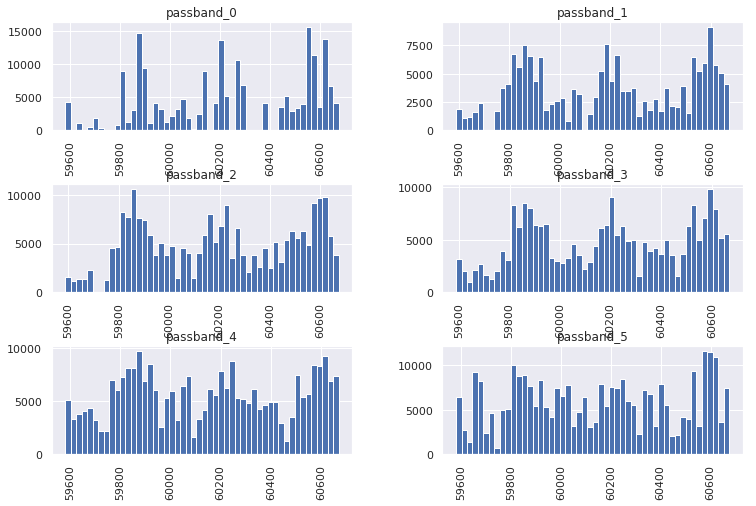

In [49]:
# mjd: the time in Modified Julian Date (MJD) of the observation. 
# Can be converted to Unix epoch time with the formula unix_time = (MJD−40587)×86400. Float64
# The number of decimal days from midnight on November 17, 1858
print ('min =', df_train.mjd.min(), '\nmax =', df_train.mjd.max())
df_train.mjd.hist(bins = 50, by = df_train.passband)
plt.show()

passband_5    299025
passband_4    277119
passband_2    238049
passband_3    233520
passband_0    197493
passband_1    176499
Name: passband, dtype: int64

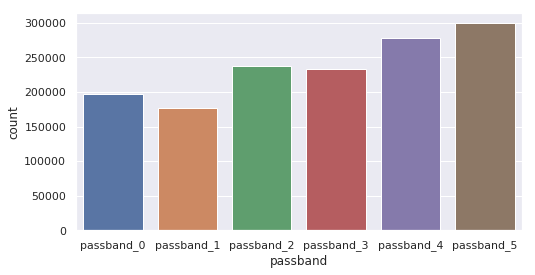

In [50]:
# passband: The specific LSST passband integer, such that u, g, r, i, z, Y = 0, 1, 2, 3, 4, 5 in which it was viewed.
# {u→0, g→1, r→2, i→3, z→4, y→5}
plt.figure(figsize(8, 4))
ax = sns.countplot(x="passband", data=df_train)
df_train.passband.value_counts()

-1149388.375 2432808.75


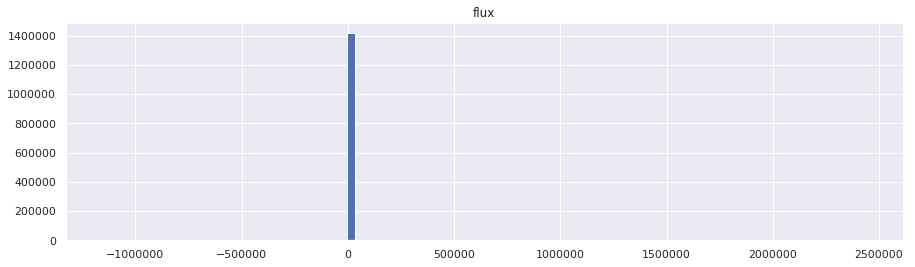

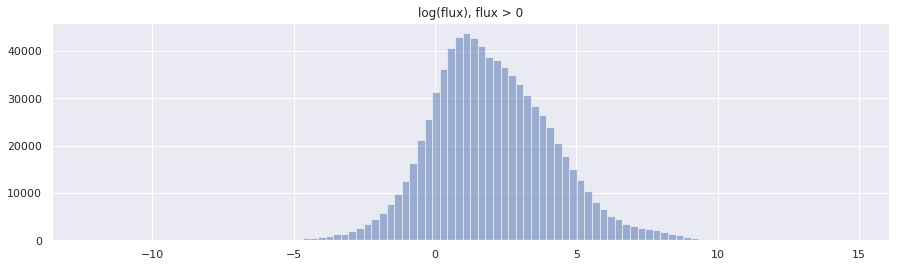

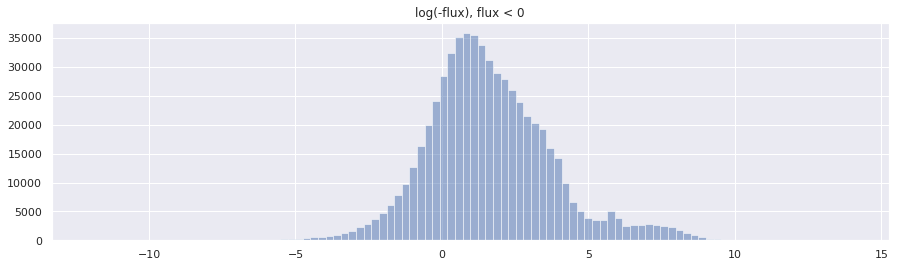

In [39]:
# flux: the measured flux (brightness) in the passband of observation as listed in the passband column. 
# These values have already been corrected for dust extinction (mwebv), though heavily extincted objects will have 
# larger uncertainties (flux_err) in spite of the correction. Float32
print (df_train.flux.min(), df_train.flux.max())
plt.figure(figsize = (15, 4))
ax = df_train.flux.hist(bins = 100)
ax.set_title('flux')
plt.figure(figsize = (15, 4))
ax = np.log(df_train.flux[df_train.flux > 0]).hist(bins = 100, alpha = 0.5)
ax.set_title('log(flux), flux > 0')
plt.figure(figsize = (15, 4))
ax = np.log(-df_train.flux[df_train.flux < 0]).hist(bins = 100, alpha = 0.5)
ax.set_title('log(-flux), flux < 0');

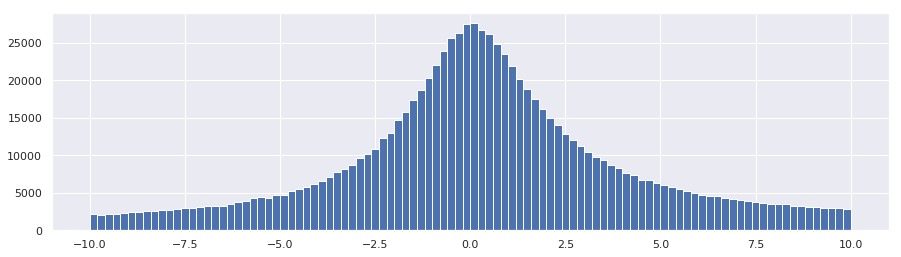

In [65]:
plt.figure(figsize = (15, 4))
ax = df_train.flux.hist(bins = 100, range = [-10, 10])

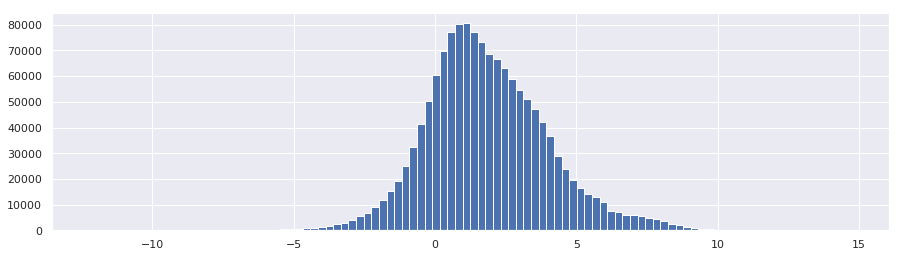

In [23]:
plt.figure(figsize = (15, 4))
plt.hist(np.log(abs(df_train.flux)), bins = 100);

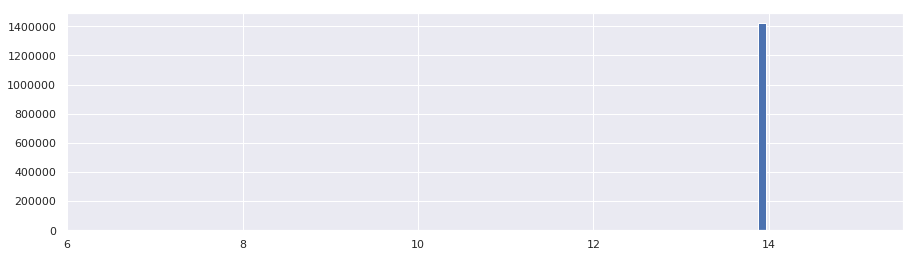

In [46]:
plt.figure(figsize = (15, 4))
plt.hist(np.log(df_train.flux + 1150000), bins = 100);

In [47]:
np.exp(14)

1202604.2841647768

In [43]:
df_train.shape

(1421705, 6)

In [36]:
df_train.flux.min()

-1149388.375

In [52]:
df_train = df_train.merge(df_train_meta[['target']], how = 'left', left_on = 'object_id', right_index = True)

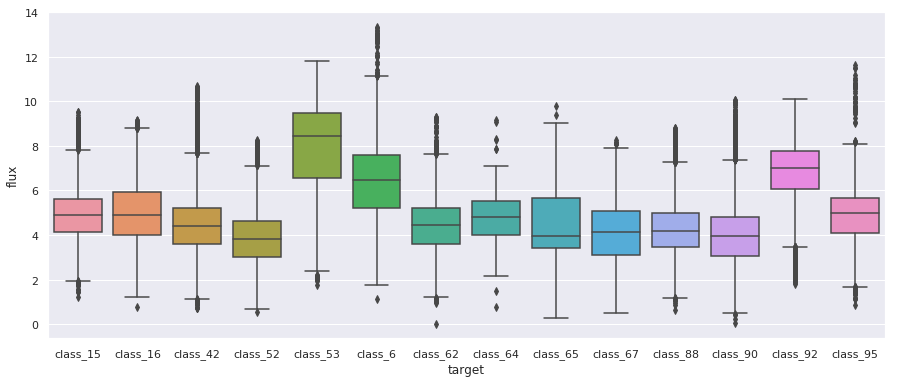

In [53]:
plt.figure(figsize(15, 6))
df_temp = df_train[df_train.detected == 1]
sns.boxplot(x = df_temp.target, y = np.log(abs(df_temp.flux)));

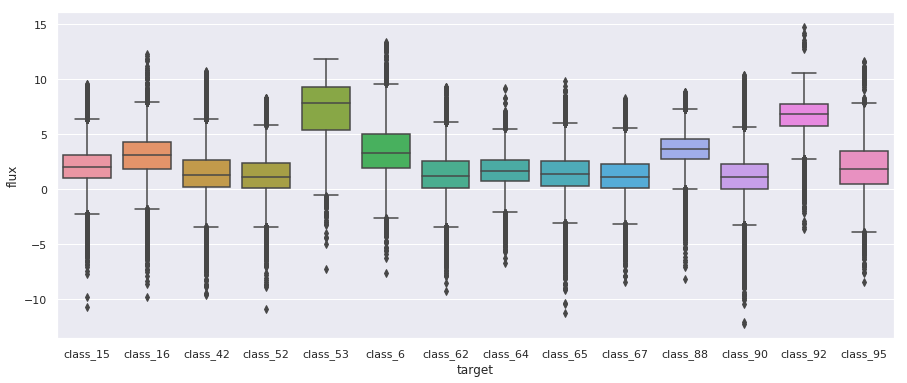

In [54]:
plt.figure(figsize(15, 6))
sns.boxplot(x = df_train.target, y = np.log(abs(df_train.flux)));

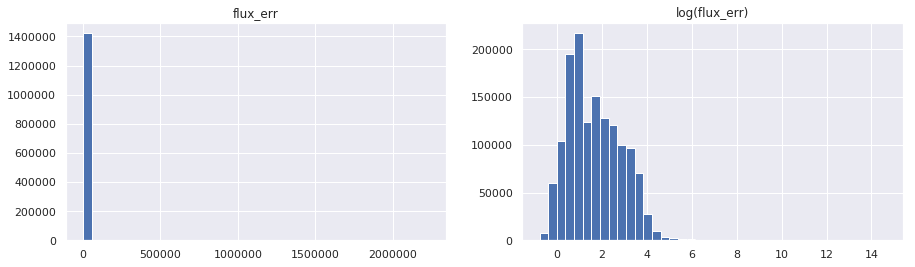

In [55]:
# flux_err: the uncertainty on the measurement of the flux listed above. Float32
# The 68% confidence interval of the measurement is in the flux_err column.
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
df_train.flux_err.hist(bins = 40, ax = ax1)
np.log(df_train.flux_err).hist(bins = 40, ax = ax2)
ax1.set_title('flux_err')
ax2.set_title('log(flux_err)');

In [56]:
# detected: If 1, the object's brightness is significantly different at the 3-sigma level relative to the reference 
# template. Only objects with at least 2 detections are included in the dataset. Boolean
# Because of difference imaging techniques, objects have to have changed significantly with respect to the template
# to be detected by LSST. Whether or not they were detected with respect to the template is reported as detected.
df_train.detected.value_counts()

0    1184825
1     236880
Name: detected, dtype: int64

In [ ]:
Признаки:
    ra, decl, gal_l, gal_b - напрямую на target не влияют
    ddf - построить отдельные модели для ddf=1 и ddf=0? давать записям с ddf=0 меньший вес при обучении?
    hostgal_specz - недоступно для большей части test set - удалить? 
                    отдельные модели для заполненных/незаполненных hostgal_specz?
    hostgal_photoz - включаем в модель
    hostgal_photoz_err - включаем в модель, можно добавить min/max возможные hostgal_photoz?
    +distmod - практически линейная зависимость от log(hostgal_photoz), 
                удаляем из модели - не даёт прироста качества на кросс-валидации
    mwebv - включаем в модель (в виде log), используем для коррекции flux?
Time-series: считаем агрегаты по каждому object_id и passband (возможно, ещё по диапазонам mjd)
    flux - в виде log? mean, median, min, max, var, trend (up/down) + специальные агрегаты для time-series?
    flux_err - включаем в модель, в виде log + используем для расчёта min/max возможных значений flux
    detected - не используем, включаем все точки